In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

import seaborn as sns
import matplotlib.pyplot as plt


VOC_SIZE = 7881
max_length_sequence = 100

np.random.seed(1)

In [2]:
#importing previously preprocessed and vectorized dataset from preprocessing notebook as pickle file


x = np.load('data.npy')
word_mat = np.load('word_mat.npy')

In [3]:
word_mat

array([[ 0.       ,  0.       ,  0.       , ...,  0.       ,  0.       ,
         0.       ],
       [-0.031087 ,  0.22155  ,  0.44494  , ..., -0.67097  ,  0.24698  ,
        -0.62001  ],
       [-0.57833  , -0.0036551,  0.34658  , ...,  0.070204 ,  0.44509  ,
         0.24148  ],
       ...,
       [-0.12201  ,  0.20465  ,  0.53192  , ..., -0.164    , -0.41637  ,
         0.66426  ],
       [ 0.       ,  0.       ,  0.       , ...,  0.       ,  0.       ,
         0.       ],
       [ 0.46119  ,  0.3567   ,  0.026078 , ..., -0.0056525,  0.55176  ,
         0.77563  ]])

In [4]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(VOC_SIZE, 100, input_length=max_length_sequence, weights = [word_mat], trainable=False))
model.add(tf.keras.layers.LSTM(10))
model.add(tf.keras.layers.Dense(1, activation = "sigmoid"))


model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics =["acc"])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 100)          788100    
_________________________________________________________________
lstm (LSTM)                  (None, 10)                4440      
_________________________________________________________________
dense (Dense)                (None, 1)                 11        
Total params: 792,551
Trainable params: 4,451
Non-trainable params: 788,100
_________________________________________________________________


In [5]:
# checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("model-{epoch:02d}.h5", save_best_only=True)

In [6]:
y = np.load("y.npy")

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [7]:
history = model.fit(X_train, y_train, epochs = 5, batch_size=16, validation_split=0.2)

Epoch 1/5
223/223 [==============================] - 6s 14ms/step - loss: 0.3197 - acc: 0.8813 - val_loss: 0.1521 - val_acc: 0.9563
Epoch 2/5
223/223 [==============================] - 3s 12ms/step - loss: 0.1469 - acc: 0.9537 - val_loss: 0.1191 - val_acc: 0.9596
Epoch 3/5
223/223 [==============================] - 3s 11ms/step - loss: 0.1236 - acc: 0.9585 - val_loss: 0.1074 - val_acc: 0.9720
Epoch 4/5
223/223 [==============================] - 3s 12ms/step - loss: 0.0992 - acc: 0.9703 - val_loss: 0.0965 - val_acc: 0.9709
Epoch 5/5
223/223 [==============================] - 3s 11ms/step - loss: 0.0880 - acc: 0.9750 - val_loss: 0.0856 - val_acc: 0.9787


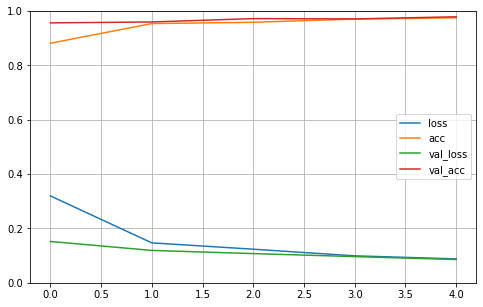

In [8]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [9]:
model.evaluate(X_test, y_test)

35/35 [==============================] - 0s 6ms/step - loss: 0.0738 - acc: 0.9776


[0.0737992376089096, 0.9775784611701965]

In [10]:
pred = model.predict(X_test)>0.5

In [11]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       976
           1       0.95      0.86      0.91       139

    accuracy                           0.98      1115
   macro avg       0.97      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115

